<a href="https://colab.research.google.com/github/Hasifa1/Machine-learning-models/blob/main/Naivebayes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/SUV_Purchase.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

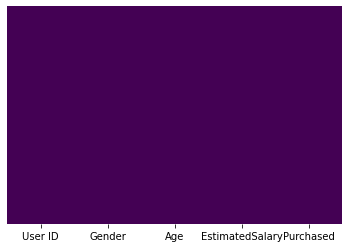

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  return plt.show()
get_heatmap(df)

In [9]:
#data preprocessing
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
#fitting the technique to dataset
df.Gender=LE.fit_transform(df.Gender)

In [10]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [11]:
df=df.drop('User ID',axis=1)

In [12]:
df.head()


,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [13]:
#X -Independent variables
#Y- Dependent variable  -output
#for feeding ml model we need to feed 2D only
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1:].values

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [15]:
#normalize
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)#normalizing
X_test=sst.transform(X_test)

In [16]:
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]])

In [17]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [18]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [19]:
y_pred=model.predict(X_test)

In [20]:
accuracy=model.score(X_test,Y_test)
print(accuracy)

0.9


In [21]:
train_accuracy=model.score(X_train,Y_train)
print(train_accuracy)

0.8857142857142857


In [25]:
sco=model.score(sst.transform(X),Y)
print(sco)

0.89
